<ipython-input-34-0c0bbf38b9b1>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm', vmin=0, vmax=1)


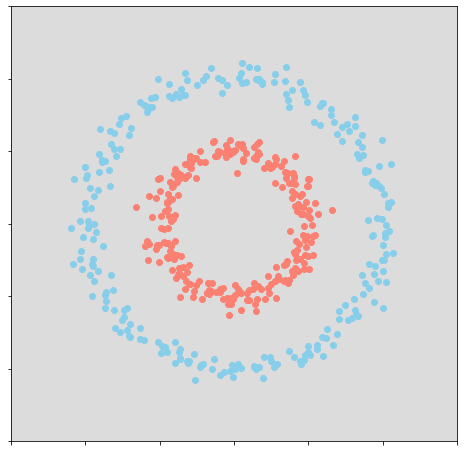

In [34]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

res = 100

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

_pY = np.zeros((res, res)) + 0.5

plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm', vmin=0, vmax=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')

plt.tick_params(labelbottom=False, labelleft=False)

Step 0 / 1000 - Loss =  0.45164657 - Acc = 0.458
Step 25 / 1000 - Loss =  0.3789202 - Acc = 0.492
Step 50 / 1000 - Loss =  0.33641785 - Acc = 0.492
Step 75 / 1000 - Loss =  0.3005833 - Acc = 0.554
Step 100 / 1000 - Loss =  0.27011994 - Acc = 0.618
Step 125 / 1000 - Loss =  0.23933277 - Acc = 0.712
Step 150 / 1000 - Loss =  0.21345292 - Acc = 0.778
Step 175 / 1000 - Loss =  0.19301581 - Acc = 0.818
Step 200 / 1000 - Loss =  0.17223066 - Acc = 0.834
Step 225 / 1000 - Loss =  0.14946896 - Acc = 0.862
Step 250 / 1000 - Loss =  0.1281732 - Acc = 0.872
Step 275 / 1000 - Loss =  0.11199579 - Acc = 0.926
Step 300 / 1000 - Loss =  0.09935218 - Acc = 0.978
Step 325 / 1000 - Loss =  0.08853835 - Acc = 0.994
Step 350 / 1000 - Loss =  0.07930566 - Acc = 0.998
Step 375 / 1000 - Loss =  0.0712087 - Acc = 0.998
Step 400 / 1000 - Loss =  0.064086854 - Acc = 1.0
Step 425 / 1000 - Loss =  0.05762832 - Acc = 1.0
Step 450 / 1000 - Loss =  0.05186486 - Acc = 1.0
Step 475 / 1000 - Loss =  0.04676679 - Acc = 

<ipython-input-33-c40356f5db1a>:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)


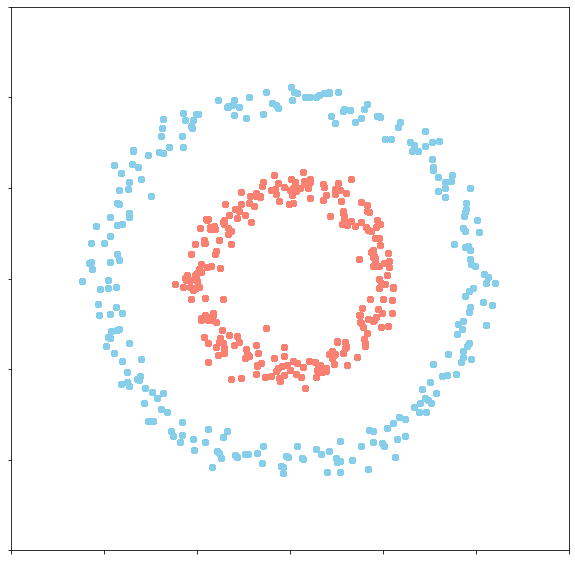

In [33]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [26]:
import tensorflow.keras as kr

lr = 0.01
nn = [2, 16, 8, 1]

# Creamos la estructura que contendrá a nuestro modelo
model = kr.Sequential()

# Capa 1
model.add(kr.layers.Dense(nn[1], activation='relu'))
# Capa 2
model.add(kr.layers.Dense(nn[2], activation='relu'))
# Capa 3
model.add(kr.layers.Dense(nn[3], activation='sigmoid'))
# Compilamos el modelo
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr), metrics=['accuracy'])

# Entrenamos al modelo
model.fit(X, Y, epochs=250)

Train on 500 samples
Epoch 1/250
500/500 [==============================] - 0s 69us/sample - loss: 0.2366 - acc: 0.4960
Epoch 2/250
500/500 [==============================] - 0s 14us/sample - loss: 0.2361 - acc: 0.5040
Epoch 3/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2356 - acc: 0.5120
Epoch 4/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2351 - acc: 0.5100
Epoch 5/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2346 - acc: 0.5180
Epoch 6/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2341 - acc: 0.5240
Epoch 7/250
500/500 [==============================] - 0s 14us/sample - loss: 0.2337 - acc: 0.5320
Epoch 8/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2333 - acc: 0.5440
Epoch 9/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2328 - acc: 0.5460
Epoch 10/250
500/500 [==============================] - 0s 12us/sample - loss: 0.2324 - 

500/500 [==============================] - 0s 12us/sample - loss: 0.1896 - acc: 0.9620
Epoch 83/250
500/500 [==============================] - 0s 14us/sample - loss: 0.1889 - acc: 0.9620
Epoch 84/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1881 - acc: 0.9620
Epoch 85/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1874 - acc: 0.9680
Epoch 86/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1867 - acc: 0.9660
Epoch 87/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1860 - acc: 0.9720
Epoch 88/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1853 - acc: 0.9740
Epoch 89/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1845 - acc: 0.9680
Epoch 90/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1838 - acc: 0.9740
Epoch 91/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1830 - acc: 0.9720
Epoch 92/250


500/500 [==============================] - 0s 12us/sample - loss: 0.1222 - acc: 1.0000
Epoch 164/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1212 - acc: 1.0000
Epoch 165/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1203 - acc: 1.0000
Epoch 166/250
500/500 [==============================] - 0s 14us/sample - loss: 0.1194 - acc: 1.0000
Epoch 167/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1185 - acc: 1.0000
Epoch 168/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1176 - acc: 1.0000
Epoch 169/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1167 - acc: 1.0000
Epoch 170/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1157 - acc: 1.0000
Epoch 171/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1149 - acc: 1.0000
Epoch 172/250
500/500 [==============================] - 0s 12us/sample - loss: 0.1139 - acc: 1.0000
Epoc

500/500 [==============================] - 0s 12us/sample - loss: 0.0589 - acc: 1.0000
Epoch 245/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0583 - acc: 1.0000
Epoch 246/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0577 - acc: 1.0000
Epoch 247/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0572 - acc: 1.0000
Epoch 248/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0566 - acc: 1.0000
Epoch 249/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0561 - acc: 1.0000
Epoch 250/250
500/500 [==============================] - 0s 12us/sample - loss: 0.0555 - acc: 1.0000


In [43]:
import sklearn as sk
import sklearn.neural_network

lr = 0.01
nn = [2, 16, 8, 1]

# Creamos el modelo
model = sk.neural_network.MLPRegressor(
    solver='sgd',
    learning_rate_init=lr,
    hidden_layer_sizes=nn[1:],
    verbose=True,
    n_iter_no_change=1000
)

# Entrenamos al modelo
model.fit(X, Y)

# Hacer predicciones
# model.predict()

Iteration 1, loss = 0.35249923
Iteration 2, loss = 0.18046782
Iteration 3, loss = 0.12598278
Iteration 4, loss = 0.12643055
Iteration 5, loss = 0.13009171
Iteration 6, loss = 0.13106613
Iteration 7, loss = 0.13086459
Iteration 8, loss = 0.12981008
Iteration 9, loss = 0.12852751
Iteration 10, loss = 0.12715129
Iteration 11, loss = 0.12626649
Iteration 12, loss = 0.12547832
Iteration 13, loss = 0.12516797
Iteration 14, loss = 0.12511463
Iteration 15, loss = 0.12499918
Iteration 16, loss = 0.12499897
Iteration 17, loss = 0.12509188
Iteration 18, loss = 0.12512000
Iteration 19, loss = 0.12512104
Iteration 20, loss = 0.12515287
Iteration 21, loss = 0.12507244
Iteration 22, loss = 0.12506495
Iteration 23, loss = 0.12505471
Iteration 24, loss = 0.12503772
Iteration 25, loss = 0.12501798
Iteration 26, loss = 0.12501362
Iteration 27, loss = 0.12502832
Iteration 28, loss = 0.12503435
Iteration 29, loss = 0.12501514
Iteration 30, loss = 0.12501573
Iteration 31, loss = 0.12500713
Iteration 32, los

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,